1. Introduction
For this challenge, the 2017 Yellow Taxi Trip Data will be used. You can download the dataset using
several ways.
The dataset includes information regarding the trip from 2 different vendors, some of the dataset
features are the pick-up and drop-off times & locations, trip distances, fares, and passenger counts.
The main part of the challenge requires coding, Python & Jupyter Notebooks are recommended.
In all the tasks you need to justify your answers.
Since the size of this dataset is quite big, a solution based on the sample of the data will also be
accepted, however, being able to deal with a big dataset will be appreciated.

2. Challenge
a) Using the taxi trip dataset mentioned above, implement a model that, given any feature of your
choice, predicts the trip duration. Justify your choice of algorithm.
b) Given the same inputs as in (a), and any other you need, implement a model that predicts the total
amount spent by the customer(s) (total_amount).
c) Provide an estimation of the models’ accuracy. What other ways to evaluate the models could be
used, please justify your results using both coding and report?
d) Which predictors would you argue are the most important for each model? Provide an explanation
of your methodology.
e) Make use of version control and github
f) Include a readme in the submission explaining how to run the project and reproduce the results
Note: Please note that the above challenges have main purposes to create a prototype in a
professional manner, by justifying either with coding in python or reporting format.

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt


In [2]:
# load the dataset
df = pd.read_csv("yello_taxi_data (1).csv")

In [3]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,2,11/21/2017 12:56,11/21/2017 13:12,1,1.76,1,N,211,164,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30
1,1,11/21/2017 12:31,11/21/2017 12:54,2,5.00,1,N,87,162,1,20.5,0.0,0.5,4.25,0.0,0.3,25.55
2,1,11/21/2017 12:15,11/21/2017 12:27,1,1.20,1,N,163,142,1,9.0,0.0,0.5,1.95,0.0,0.3,11.75
3,1,11/21/2017 12:38,11/21/2017 12:46,1,0.80,1,N,239,238,1,7.0,0.0,0.5,1.55,0.0,0.3,9.35
4,1,11/21/2017 12:48,11/21/2017 12:54,1,0.90,1,N,238,142,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   VendorID               1048575 non-null  int64  
 1   tpep_pickup_datetime   1048575 non-null  object 
 2   tpep_dropoff_datetime  1048575 non-null  object 
 3   passenger_count        1048575 non-null  int64  
 4   trip_distance          1048575 non-null  float64
 5   RatecodeID             1048575 non-null  int64  
 6   store_and_fwd_flag     1048575 non-null  object 
 7   PULocationID           1048575 non-null  int64  
 8   DOLocationID           1048575 non-null  int64  
 9   payment_type           1048575 non-null  int64  
 10  fare_amount            1048575 non-null  float64
 11  extra                  1048575 non-null  float64
 12  mta_tax                1048575 non-null  float64
 13  tip_amount             1048575 non-null  float64
 14  tolls_amount      

In [5]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.559211e+00,1.663500e+00,2.842899e+00,1.040037e+00,1.637744e+02,1.613085e+02,1.395208e+00,1.257202e+01,3.441722e-01,4.974025e-01,1.624659e+00,3.055308e-01,2.996369e-01,1.564580e+01
std,4.964819e-01,1.278677e+00,3.667040e+00,3.303689e-01,6.668935e+01,7.067580e+01,5.094582e-01,1.361869e+01,4.721913e-01,3.916966e-02,2.491698e+00,1.950313e+00,1.399357e-02,1.577748e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-1.500000e+02,-4.500000e+00,-5.000000e-01,-1.706000e+01,-5.760000e+00,-3.000000e-01,-1.508000e+02
25%,1.000000e+00,1.000000e+00,9.600000e-01,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.300000e+00
50%,2.000000e+00,1.000000e+00,1.600000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.000000e+00,0.000000e+00,5.000000e-01,1.060000e+00,0.000000e+00,3.000000e-01,1.130000e+01
75%,2.000000e+00,2.000000e+00,2.960000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.400000e+01,5.000000e-01,5.000000e-01,2.200000e+00,0.000000e+00,3.000000e-01,1.716000e+01
max,2.000000e+00,9.000000e+00,3.865800e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.006000e+03,6.520000e+00,3.450000e+00,4.400000e+02,8.285200e+02,3.000000e-01,8.006800e+03


In [6]:
df.isnull().sum()

VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64

In [7]:
df.shape

(1048575, 17)

a) Using the taxi trip dataset mentioned above, implement a model that, given any feature of your choice, predicts the trip duration. Justify your choice of algorithm

In [8]:
# Feature engineering (e.g., extracting hour of the day from the timestamp)
df['pickup_hour'] = pd.to_datetime(df['tpep_pickup_datetime']).dt.hour
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
0,2,11/21/2017 12:56,11/21/2017 13:12,1,1.76,1,N,211,164,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30,12
1,1,11/21/2017 12:31,11/21/2017 12:54,2,5.00,1,N,87,162,1,20.5,0.0,0.5,4.25,0.0,0.3,25.55,12
2,1,11/21/2017 12:15,11/21/2017 12:27,1,1.20,1,N,163,142,1,9.0,0.0,0.5,1.95,0.0,0.3,11.75,12
3,1,11/21/2017 12:38,11/21/2017 12:46,1,0.80,1,N,239,238,1,7.0,0.0,0.5,1.55,0.0,0.3,9.35,12
4,1,11/21/2017 12:48,11/21/2017 12:54,1,0.90,1,N,238,142,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,11/25/2017 17:40,11/25/2017 17:57,1,2.00,1,N,237,234,1,12.0,0.0,0.5,1.20,0.0,0.3,14.00,17
1048571,2,11/25/2017 17:02,11/25/2017 17:08,1,0.96,1,N,151,238,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,17
1048572,2,11/25/2017 17:08,11/25/2017 17:21,1,2.65,1,N,238,75,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30,17
1048573,2,11/25/2017 17:29,11/25/2017 17:34,1,0.80,1,N,263,236,1,6.0,0.0,0.5,1.00,0.0,0.3,7.80,17


In [9]:
df

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour
0,2,11/21/2017 12:56,11/21/2017 13:12,1,1.76,1,N,211,164,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30,12
1,1,11/21/2017 12:31,11/21/2017 12:54,2,5.00,1,N,87,162,1,20.5,0.0,0.5,4.25,0.0,0.3,25.55,12
2,1,11/21/2017 12:15,11/21/2017 12:27,1,1.20,1,N,163,142,1,9.0,0.0,0.5,1.95,0.0,0.3,11.75,12
3,1,11/21/2017 12:38,11/21/2017 12:46,1,0.80,1,N,239,238,1,7.0,0.0,0.5,1.55,0.0,0.3,9.35,12
4,1,11/21/2017 12:48,11/21/2017 12:54,1,0.90,1,N,238,142,1,6.0,0.0,0.5,1.36,0.0,0.3,8.16,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048570,1,11/25/2017 17:40,11/25/2017 17:57,1,2.00,1,N,237,234,1,12.0,0.0,0.5,1.20,0.0,0.3,14.00,17
1048571,2,11/25/2017 17:02,11/25/2017 17:08,1,0.96,1,N,151,238,2,6.0,0.0,0.5,0.00,0.0,0.3,6.80,17
1048572,2,11/25/2017 17:08,11/25/2017 17:21,1,2.65,1,N,238,75,2,11.5,0.0,0.5,0.00,0.0,0.3,12.30,17
1048573,2,11/25/2017 17:29,11/25/2017 17:34,1,0.80,1,N,263,236,1,6.0,0.0,0.5,1.00,0.0,0.3,7.80,17


In [13]:

# Convert pickup and dropoff times to datetime
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])


# Feature engineering: Calculate trip duration in minutes
df['trip_duration'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60


In [14]:
# Select numerical features
numerical_features = df.select_dtypes(include=['number'])

# Display the numerical features
print(numerical_features)

         VendorID  passenger_count  trip_distance  RatecodeID  PULocationID  \
0               2                1           1.76           1           211   
1               1                2           5.00           1            87   
2               1                1           1.20           1           163   
3               1                1           0.80           1           239   
4               1                1           0.90           1           238   
...           ...              ...            ...         ...           ...   
1048570         1                1           2.00           1           237   
1048571         2                1           0.96           1           151   
1048572         2                1           2.65           1           238   
1048573         2                1           0.80           1           263   
1048574         2                1           3.27           1           236   

         DOLocationID  payment_type  fare_amount  e

In [15]:
# Drop non-numerical features
df = df.select_dtypes(include=['number'])

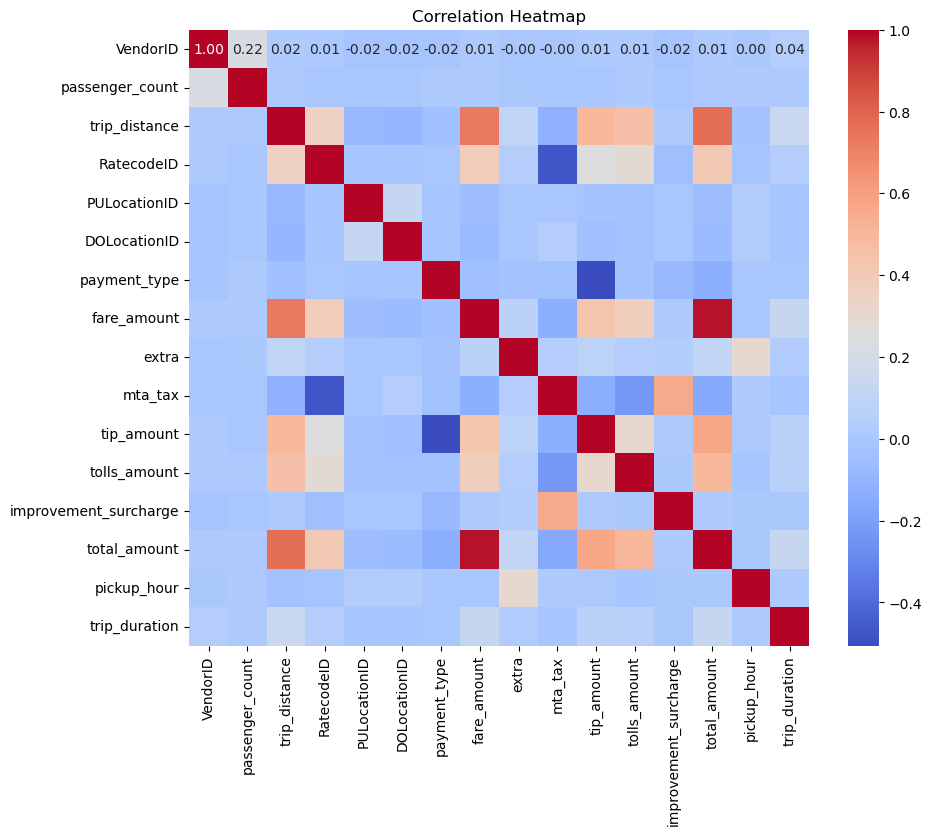

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [17]:
correlation_matrix

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,pickup_hour,trip_duration
VendorID,1.000000,0.218803,0.021222,0.007699,-0.021559,-0.018222,-0.018505,0.010802,-0.001345,-0.003600,0.010564,0.005970,-0.020976,0.011796,0.000783,0.042262
passenger_count,0.218803,1.000000,0.013748,-0.001750,-0.003384,-0.004178,0.013390,0.008911,0.002789,-0.000511,-0.002478,0.007666,-0.004206,0.008359,0.011998,0.014083
trip_distance,0.021222,0.013748,1.000000,0.356137,-0.084297,-0.092902,-0.045273,0.732912,0.095792,-0.117615,0.497645,0.458543,0.016864,0.770562,-0.031387,0.142384
RatecodeID,0.007699,-0.001750,0.356137,1.000000,-0.013440,-0.013262,-0.009681,0.383755,0.046592,-0.475381,0.250919,0.284344,-0.052863,0.406226,-0.019325,0.042838
PULocationID,-0.021559,-0.003384,-0.084297,-0.013440,1.000000,0.118552,-0.019085,-0.056691,-0.009983,-0.001412,-0.027545,-0.031569,-0.002222,-0.057516,0.032301,-0.012755
DOLocationID,-0.018222,-0.004178,-0.092902,-0.013262,0.118552,1.000000,-0.014700,-0.067882,-0.009858,0.043403,-0.042182,-0.038451,-0.001209,-0.070225,0.032189,-0.016326
payment_type,-0.018505,0.013390,-0.045273,-0.009681,-0.019085,-0.014700,1.000000,-0.045531,-0.030398,-0.039821,-0.505849,-0.027211,-0.078236,-0.123747,-0.008028,-0.002240
fare_amount,0.010802,0.008911,0.732912,0.383755,-0.056691,-0.067882,-0.045531,1.000000,0.072390,-0.131778,0.433115,0.372687,0.015226,0.979569,-0.006767,0.124886
extra,-0.001345,0.002789,0.095792,0.046592,-0.009983,-0.009858,-0.030398,0.072390,1.000000,0.045359,0.080787,0.044190,0.034457,0.110788,0.302995,0.025267
mta_tax,-0.003600,-0.000511,-0.117615,-0.475381,-0.001412,0.043403,-0.039821,-0.131778,0.045359,1.000000,-0.130608,-0.230036,0.561039,-0.158476,0.021358,-0.014214


In [18]:
correlation_matrix['trip_duration']

VendorID                 0.042262
passenger_count          0.014083
trip_distance            0.142384
RatecodeID               0.042838
PULocationID            -0.012755
DOLocationID            -0.016326
payment_type            -0.002240
fare_amount              0.124886
extra                    0.025267
mta_tax                 -0.014214
tip_amount               0.072388
tolls_amount             0.060859
improvement_surcharge    0.002309
total_amount             0.127489
pickup_hour              0.007514
trip_duration            1.000000
Name: trip_duration, dtype: float64

In [19]:
# Calculate correlations with 'trip_duration'
correlations = df.corr()['trip_duration'].abs()

# Set a threshold for high correlation (adjust as needed)
high_correlation_threshold = 0.5

# Select features with high correlation to 'trip_duration'
high_correlated_features = correlations[correlations > high_correlation_threshold].index.tolist()

# Remove 'trip_duration' itself from the list
high_correlated_features.remove('trip_duration')

# Display the high correlated features
print(high_correlated_features)

[]


In [20]:


# Calculate correlations with 'trip_duration'
correlations = df.corr()['trip_duration']

# Get absolute correlations for ranking
abs_correlations = correlations.abs()

# Select top 5-10 correlated features (adjust number as needed)
num_features_to_select = 10
top_correlated_features = abs_correlations.nlargest(num_features_to_select).index.tolist()

# Separate positively and negatively correlated features
positively_correlated = [feature for feature in top_correlated_features if correlations[feature] > 0]
negatively_correlated = [feature for feature in top_correlated_features if correlations[feature] < 0]

# Display results
print("Top Positively Correlated Features:")
print(positively_correlated)

print("\nTop Negatively Correlated Features:")
print(negatively_correlated)

Top Positively Correlated Features:
['trip_duration', 'trip_distance', 'total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'RatecodeID', 'VendorID', 'extra']

Top Negatively Correlated Features:
['DOLocationID']


In [21]:
# Combine selected features (adjust as needed)
selected_features = positively_correlated[:8] + negatively_correlated[:5]

# Selecting features and target variable
features = selected_features
target = 'trip_duration'

X = df[features]
y = df[target]

print("Selected Features:", features)

Selected Features: ['trip_duration', 'trip_distance', 'total_amount', 'fare_amount', 'tip_amount', 'tolls_amount', 'RatecodeID', 'VendorID', 'DOLocationID']


In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ... (previous code for feature selection) ...

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models and hyperparameter grids
models = {
    'Linear Regression': (LinearRegression(), {}),
    'Ridge Regression': (Ridge(), {'alpha': [0.1, 1, 10]}),
    'Lasso Regression': (Lasso(), {'alpha': [0.1, 1, 10]}),
    'Decision Tree': (DecisionTreeRegressor(), {'max_depth': [None, 5, 10]}),
    'Random Forest': (RandomForestRegressor(), {'n_estimators': [5, 10], 'max_depth': [None, 5, 10]})
}

# Iterate over models, perform hyperparameter tuning, and evaluate
for model_name, (model, param_grid) in models.items():
    print(f"Evaluating {model_name}...")
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print("-" * 30)

Evaluating Linear Regression...
Best Hyperparameters: {}
Mean Squared Error: 2.623816198106207e-24
R-squared: 1.0
------------------------------
Evaluating Ridge Regression...
Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error: 3.587427296654541e-18
R-squared: 1.0
------------------------------
Evaluating Lasso Regression...
Best Hyperparameters: {'alpha': 0.1}
Mean Squared Error: 2.342415140278433e-06
R-squared: 0.9999999994687728
------------------------------
Evaluating Decision Tree...
Best Hyperparameters: {'max_depth': None}
Mean Squared Error: 0.011034022363684047
R-squared: 0.9999974976369995
------------------------------
Evaluating Random Forest...
Best Hyperparameters: {'max_depth': 10, 'n_estimators': 10}
Mean Squared Error: 0.005366155259919133
R-squared: 0.9999987830305274
------------------------------


In [ ]:

# # Feature engineering (e.g., extracting hour of the day from the timestamp)
# df['pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# df['dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])
# df['trip_duration'] = (df['dropoff_datetime'] - df['pickup_datetime']).dt.total_seconds() / 60
# df['pickup_hour'] = df['pickup_datetime'].dt.hour
# df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

# # Selecting features and target variable for trip duration prediction
# features_duration = ['trip_distance', 'pickup_hour', 'passenger_count']
# target_duration = 'trip_duration'

# X_duration = df[features_duration]
# y_duration = df[target_duration]

# # Splitting the data for trip duration prediction
# X_train_dur, X_test_dur, y_train_dur, y_test_dur = train_test_split(X_duration, y_duration, test_size=0.2, random_state=42)

# # Choosing and training the model for trip duration prediction
# model_duration = RandomForestRegressor(n_estimators=100, random_state=42)
# model_duration.fit(X_train_dur, y_train_dur)

# # Making predictions for trip duration
# y_pred_dur = model_duration.predict(X_test_dur)

# # Evaluating the model for trip duration
# mae_dur = mean_absolute_error(y_test_dur, y_pred_dur)
# mse_dur = mean_squared_error(y_test_dur, y_pred_dur)
# r2_dur = r2_score(y_test_dur, y_pred_dur)

# print(f'Trip Duration Prediction - MAE: {mae_dur}, MSE: {mse_dur}, R²: {r2_dur}')



In [ ]:
# print(f'Total Amount Prediction - MAE: {mae_amt}, MSE: {mse_amt}, R²: {r2_amt}')

In [23]:

# Calculate correlations with 'total amount'
correlations = df.corr()['total_amount']

# Get absolute correlations for ranking
abs_correlations = correlations.abs()

# Select top 8-10 correlated features (adjust number as needed)
num_features_to_select = 10
top_correlated_features = abs_correlations.nlargest(num_features_to_select).index.tolist()

# Separate positively and negatively correlated features
positively_correlated = [feature for feature in top_correlated_features if correlations[feature] > 0]
negatively_correlated = [feature for feature in top_correlated_features if correlations[feature] < 0]

# Display results
print("Top Positively Correlated Features:")
print(positively_correlated)

print("\nTop Negatively Correlated Features:")
print(negatively_correlated)

Top Positively Correlated Features:
['total_amount', 'fare_amount', 'trip_distance', 'tip_amount', 'tolls_amount', 'RatecodeID', 'trip_duration', 'extra']

Top Negatively Correlated Features:
['mta_tax', 'payment_type']


In [24]:
top_correlated_features

['total_amount',
 'fare_amount',
 'trip_distance',
 'tip_amount',
 'tolls_amount',
 'RatecodeID',
 'mta_tax',
 'trip_duration',
 'payment_type',
 'extra']

In [27]:
# Combine selected features (adjust as needed)
selected_features = positively_correlated[:8] + negatively_correlated[:5]

# Remove 'total_amount' from the list
top_correlated_features = selected_features#.remove('total_amount')

# Selecting features and target variable
features = top_correlated_features
target = 'total_amount'

X = df[features]
y = df[target]



# Splitting the data for total amount prediction
X_train_amt, X_test_amt, y_train_amt, y_test_amt = train_test_split(X, y, test_size=0.3, random_state=42)

# Choosing and training the model for total amount prediction
model_amount = RandomForestRegressor(n_estimators=100, random_state=42)
model_amount.fit(X_train_amt, y_train_amt)

# Making predictions for total amount
y_pred_amt = model_amount.predict(X_test_amt)

# Evaluating the model for total amount
mae_amt = mean_absolute_error(y_test_amt, y_pred_amt)
mse_amt = mean_squared_error(y_test_amt, y_pred_amt)
r2_amt = r2_score(y_test_amt, y_pred_amt)

In [29]:
print(f'MAE: {mae_amt}, MSE: {mse_amt}, R²: {r2_amt}')

MAE: 0.02370086752553823, MSE: 165.42252586967876, R²: 0.5733886157482186


Part (c): Model Evaluation I have already calculated Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²) for both models. We can further validate the models using cross-validation. Cross-validation:

In [35]:
# Assuming 'total_amount' is the target variable in the DataFrame df
y_amount = df['total_amount']

# Assuming all other columns are features, or select specific features
X_amount = df.drop(columns=['total_amount'])
# Alternatively, you can select specific features
# X_amount = df[['feature1', 'feature2', 'feature3']]

model_amount = LinearRegression()

# Cross-validation for total amount prediction
cv_scores_amt = cross_val_score(model_amount, X_amount, y_amount, cv=5, scoring='neg_mean_absolute_error')
print(f'Cross-validated MAE for Total Amount Prediction: {-np.mean(cv_scores_amt)}')

from sklearn.ensemble import RandomForestRegressor

# Instantiate the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data for total amount prediction
rf_model.fit(X_amount, y_amount)

# Get feature importances
importances = rf_model.feature_importances_

# Create a list of feature names and their corresponding importance
feature_importance = list(zip(X_amount.columns, importances))

# Sort the features by importance
feature_importance_sorted = sorted(feature_importance, key=lambda x: x[1], reverse=True)

# Display the sorted features and their importance
for feature, importance in feature_importance_sorted:
    print(f'Feature: {feature}, Importance: {importance}')



Cross-validated MAE for Total Amount Prediction: 0.0055961293477132645
Feature: fare_amount, Importance: 0.7835209757162437
Feature: extra, Importance: 0.1458446401095402
Feature: tip_amount, Importance: 0.02979481850087247
Feature: mta_tax, Importance: 0.02756708724508502
Feature: tolls_amount, Importance: 0.012672993202549943
Feature: improvement_surcharge, Importance: 0.0003534906073868278
Feature: PULocationID, Importance: 4.8050187079642944e-05
Feature: trip_duration, Importance: 4.437072609318299e-05
Feature: pickup_hour, Importance: 4.370387829197072e-05
Feature: trip_distance, Importance: 3.8641571713945606e-05
Feature: DOLocationID, Importance: 3.415298955147689e-05
Feature: passenger_count, Importance: 2.0925414361993878e-05
Feature: VendorID, Importance: 7.911591833170527e-06
Feature: RatecodeID, Importance: 6.441797200900794e-06
Feature: payment_type, Importance: 1.7964621955527185e-06


Part (d): Important Predictors Using feature importances from the RandomForestRegressor to identify the most important features.

In [ ]:
# Feature importance for trip duration prediction
importances_dur = model_duration.feature_importances_
indices_dur = np.argsort(importances_dur)[::-1]
feature_names_dur = X_duration.columns

print("Feature importance for Trip Duration Prediction:")
for i in range(len(importances_dur)):
    print(f"{feature_names_dur[indices_dur[i]]}: {importances_dur[indices_dur[i]]}")

# Feature importance for total amount prediction
importances_amt = model_amount.feature_importances_
indices_amt = np.argsort(importances_amt)[::-1]
feature_names_amt = X_amount.columns

print("Feature importance for Total Amount Prediction:")
for i in range(len(importances_amt)):
    print(f"{feature_names_amt[indices_amt[i]]}: {importances_amt[indices_amt[i]]}")
